In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import r2_score

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# import the regressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [4]:
import pandas as pd

# Read the RF dataset from CSV file
data = pd.read_csv('RFLFSODataFull.csv')

print("Dataset:")
data.head(5)

Dataset:


,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


In [3]:
# Check the dimensions of the RF dataset
print("\nRF Dataset Dimensions:")
data.shape


RF Dataset Dimensions:


(91379, 27)

In [ ]:
# Calculate summary statistics for the RF dataset
print("\nRF Dataset Summary Statistics:")
data.describe()

In [ ]:
# Check the data types of each column in the RF dataset
print("\nRF Dataset Data Types:")
data.dtypes

In [ ]:
# Identify any outliers or anomalies
sns.boxplot(data=data['RFL_Att'])
plt.show()

# For FSO

In [5]:
fso_data = data.drop("RFL_Att", axis = 1).copy()

In [ ]:
fso_data.head(1)

In [6]:
print("\nRF Dataset Summary Statistics:")
fso_data.describe()


RF Dataset Summary Statistics:


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
count,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,9.137900e+04,91379.000000,91379.000000,91379.000000,91379.000000,...,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000
mean,6.769458,9.553919,10.032760,9.076251,3297.930328,7.850005e+10,27.065979,28.417120,25.717089,0.246973,...,13.166020,11.904558,11.373193,32986.417484,34636.684647,31331.618978,89.043304,0.739065,1.851020,0.702242
std,3.903843,5.858577,6.162798,5.575927,1224.305893,5.000027e+09,72.134023,75.761896,68.595239,1.642323,...,9.589755,8.694028,6.942229,24713.874445,25978.845228,23497.873065,26.415610,0.871314,1.762698,0.828796
min,0.788363,1.141556,1.238270,1.049744,2012.000148,7.350000e+10,0.000000,0.000000,0.000000,0.000000,...,-6.693373,-7.270075,0.000000,10.151990,11.029667,9.484346,0.000000,0.000000,0.000000,0.000000
25%,3.473063,4.958993,5.205861,4.709511,2019.431812,7.350000e+10,0.000000,0.000000,0.000000,0.000000,...,4.905387,4.438425,5.000000,11158.598400,11721.447542,10588.793237,82.976727,0.076749,0.512667,0.072912
50%,6.336167,6.870737,7.205499,6.524046,2959.863686,8.350000e+10,0.000000,0.000000,0.000000,0.000000,...,10.803943,9.774467,11.000000,26378.636210,27686.214032,25047.188462,90.867362,0.437995,1.323101,0.416274
75%,8.664984,14.049470,14.782679,13.379256,4820.890157,8.350000e+10,16.947618,17.775980,16.038090,0.000000,...,22.470382,20.322434,17.000000,53493.821285,56092.212376,50797.690402,98.482652,1.088621,2.681788,1.036574
max,32.455222,24.790883,26.407305,24.268431,4827.999971,8.350000e+10,1621.001906,1753.747866,1500.666382,87.264777,...,40.771383,36.724191,23.000000,75004.999150,82503.130084,74999.343414,360.000000,7.799086,16.421115,7.252319


In [7]:
# Handle categorical variable encoding
# Perform one-hot encoding for 'SYNOP Code'
fso_data = pd.get_dummies(fso_data, columns=['SYNOPCode'], prefix='SYNOP')

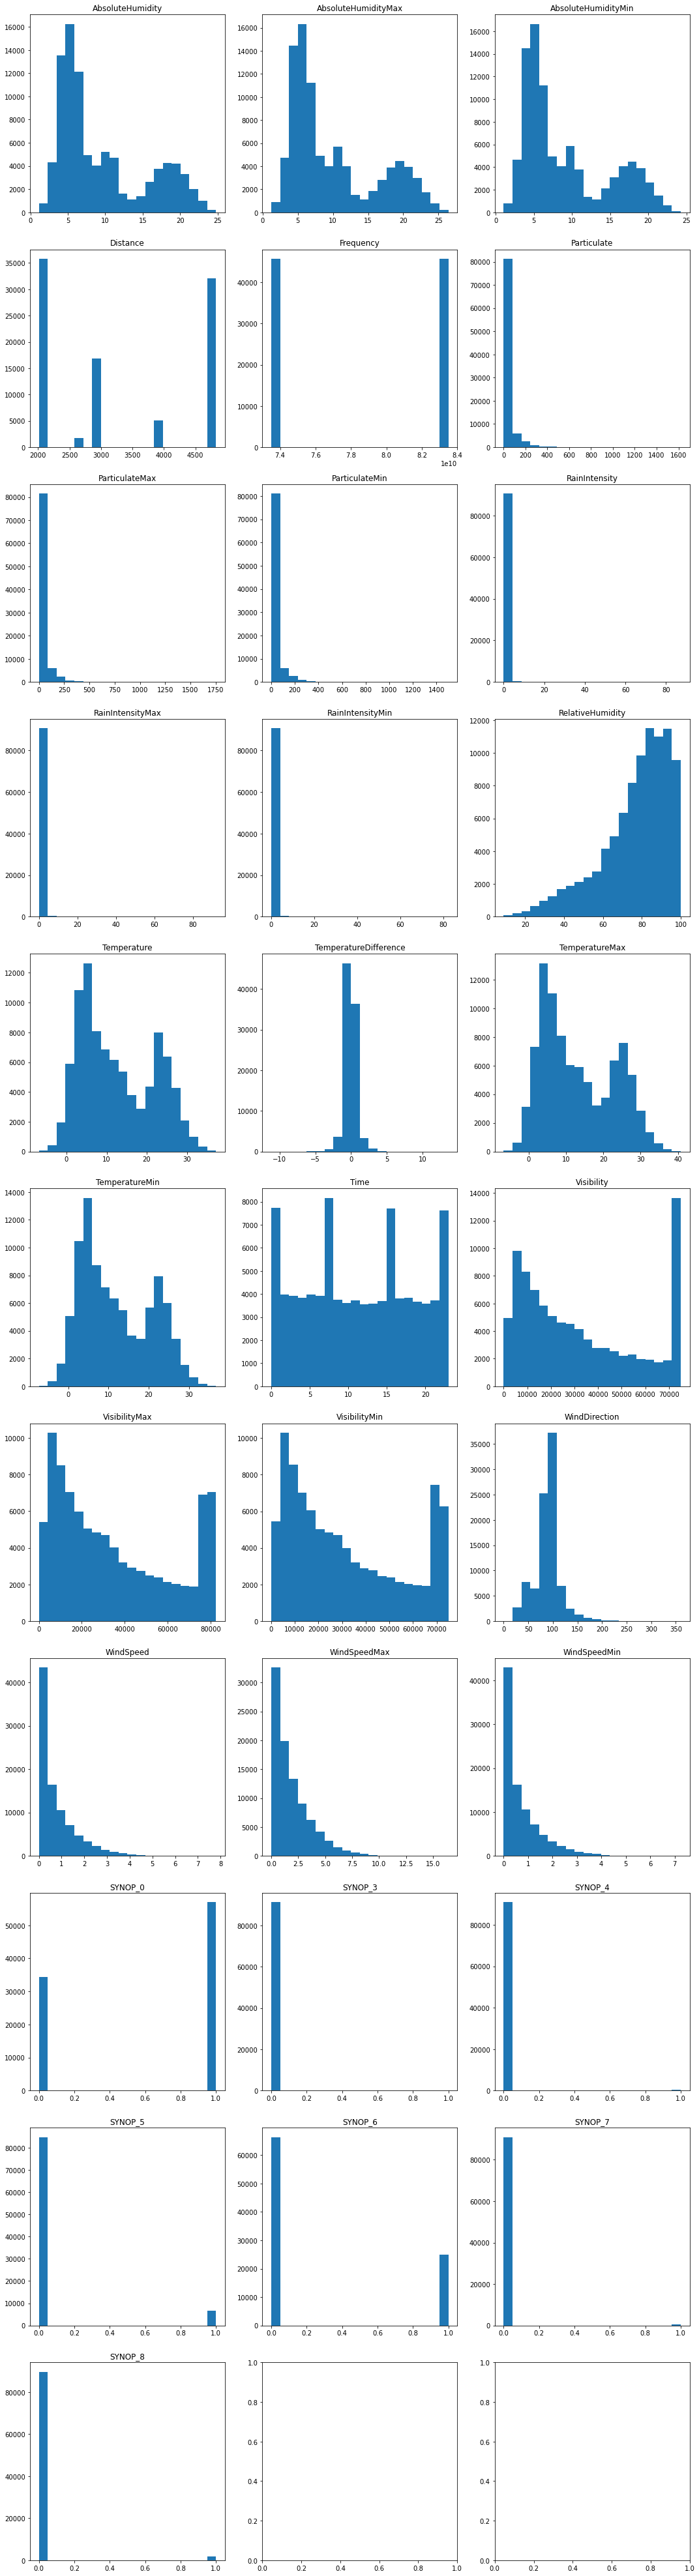

In [8]:
import matplotlib.pyplot as plt

# Exclude non-feature columns from visualization
feature_columns = fso_data.columns.drop(['FSO_Att']).copy()

# Define the number of rows and columns for subplots
num_rows = int(len(feature_columns) / 3) + 1
num_cols = 3

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to facilitate indexing in the loop
axes = axes.flatten()

# Iterate over the feature columns and create plots
for i, feature in enumerate(feature_columns):
    # Plot the feature in the corresponding subplot
    axes[i].hist(fso_data[feature], bins=20)
    axes[i].set_title(feature)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## Split Data

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = fso_data.drop('FSO_Att', axis=1).copy()
y = fso_data['FSO_Att']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Correlation

In [ ]:
# Create a correlation matrix heatmap
# plt.figure(figsize=(15, 15))
# sns.heatmap(fso_data.corr(), annot=True, cmap='coolwarm')
# plt.show()

In [ ]:
# Calculate correlations with the target variable ('RFL_Att')
# correlations = fso_data.corr()['FSO_Att'].sort_values(ascending=False)
# print(correlations)

## Feature Selection

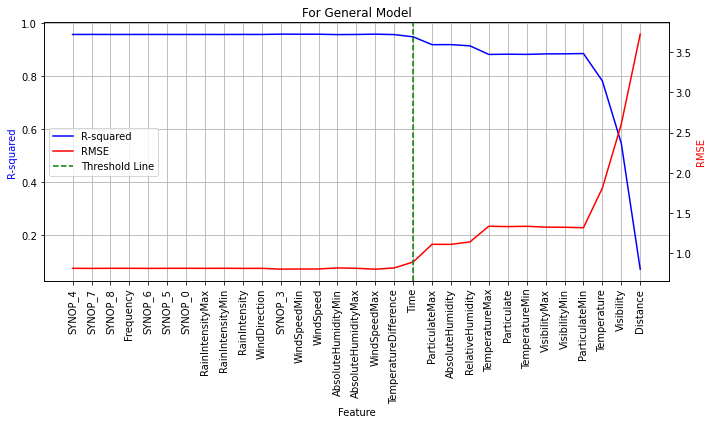

In [10]:
# Create a Random Forest regressor with OOB scoring enabled
model = RandomForestRegressor(oob_score=True, random_state=42, n_jobs = -1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the feature importances from the model
feature_importances = model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Get the names of the selected features
selected_feature_names = X_train.columns[sorted_indices].tolist()

# Reverse the names of the features
selected_feature_names.reverse()

# Initialize a list to store the results
results = []
rmse_values = []
r2_values = []

# Select all features
selected_features = sorted_indices.copy()

while len(selected_features) > 0:
    # Train the model with the selected features
    model.fit(X_train.iloc[:, selected_features], y_train)

    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train.iloc[:, selected_features])
    y_test_pred = model.predict(X_test.iloc[:, selected_features])

    # Calculate RMSE and R-squared values
    MSE_train = np.square(np.subtract(y_train, y_train_pred)).mean()
    train_rmse = np.sqrt(MSE_train)
    MSE_test = np.square(np.subtract(y_test, y_test_pred)).mean()
    test_rmse = np.sqrt(MSE_test)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Append the values to the respective lists
    rmse_values.append(test_rmse)
    r2_values.append(test_r2)

    # Store the results
    results.append((train_rmse, test_rmse, train_r2, test_r2))

    # Remove the least important feature and its name
    selected_features = selected_features[:-1]

# Get the index for line plotting
line_idx = selected_feature_names.index("Time")

# Plot the RMSE and R-squared values
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(selected_feature_names, r2_values, 'b-', label='R-squared')
ax2.plot(selected_feature_names, rmse_values, 'r-', label='RMSE')


# Plot the vertical line at the "frequency" feature position
ax2.axvline(x=line_idx, color='g', linestyle='--', label='Threshold Line')

ax1.tick_params(axis='x', labelrotation = 90)

ax1.set_xlabel('Feature')
ax1.set_ylabel('R-squared', color='b')
ax2.set_ylabel('RMSE', color='r')
ax1.grid(True)

# Display the legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
# ax1.legend(lines, labels, loc='best')
ax1.legend(lines, labels, loc='center left')


plt.title('For General Model')

plt.tight_layout()
plt.show()

## SYNOP Code 

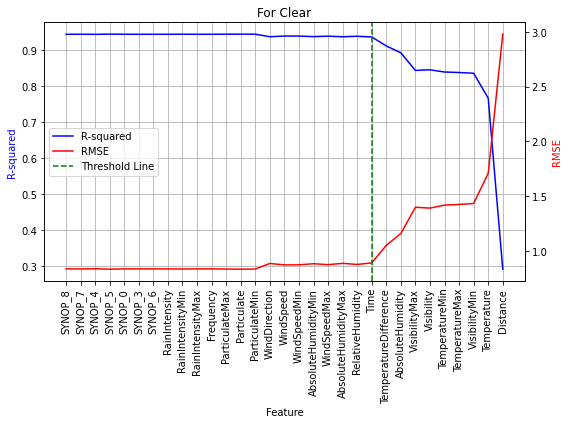

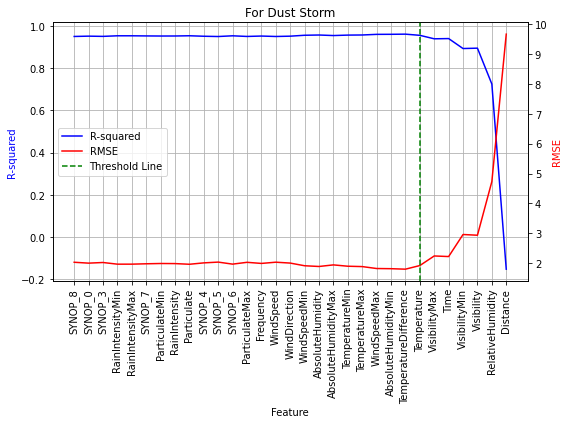

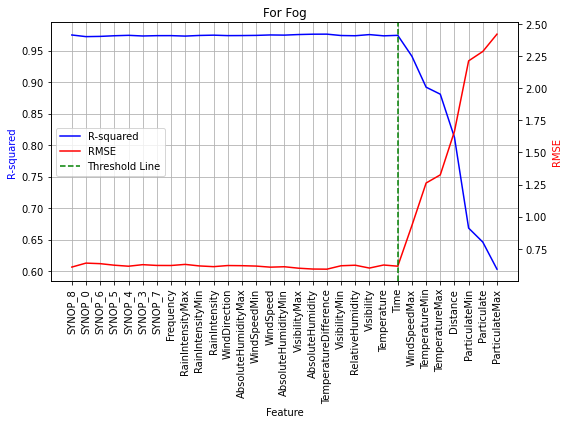

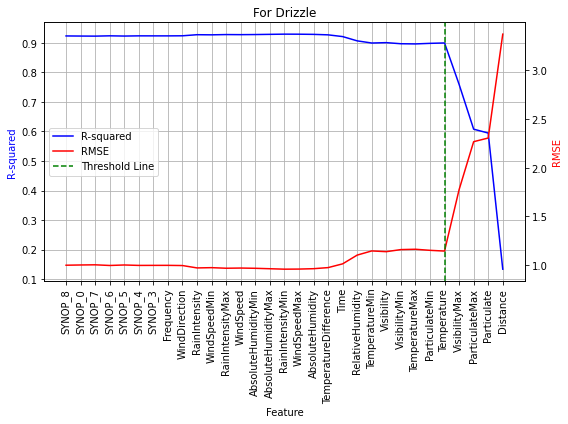

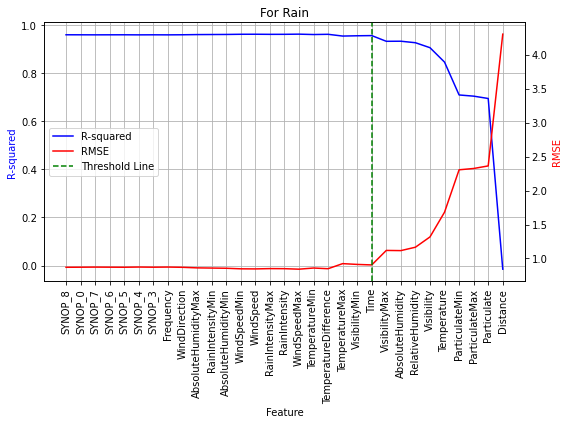

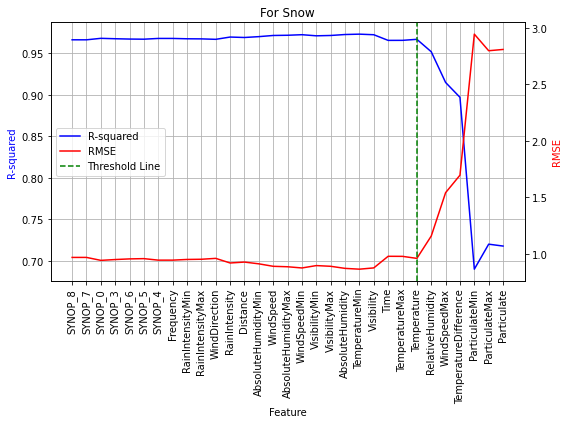

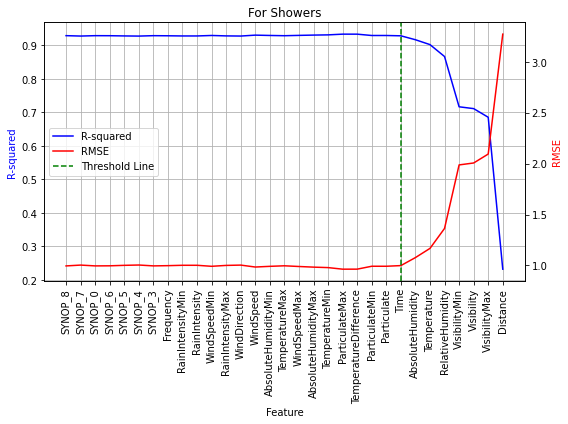

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create a dictionary to store RMSE and R-squared values for each SYNOP subset
results = {}

# Define the list of SYNOP code columns
synop_columns = ['SYNOP_0', 'SYNOP_3', 'SYNOP_4', 'SYNOP_5', 'SYNOP_6', 'SYNOP_7', 'SYNOP_8']


# Iterate over each SYNOP code column
for synop_column in synop_columns:
    # Filter the dataset where SYNOP code column has a value of 1
    fso_data_copy = fso_data.copy()
    subset = fso_data_copy[fso_data_copy[synop_column] == 1]

    # Check if there are any rows for the specific SYNOP code
    if len(subset) == 0:
        print(f"No data for SYNOP {synop_column.replace('SYNOP_', '')}")
        continue

    # Split the subset into training and testing data
    X_train, X_test, y_train, fso_y_test = train_test_split(subset.drop('FSO_Att', axis=1), subset['FSO_Att'], test_size=0.3, random_state=42)

    # Create a Random Forest regressor
    model = RandomForestRegressor(random_state=42, n_jobs=-1)

    # Train the model
    model.fit(X_train, y_train)

    # Get the feature importances from the model
    feature_importances = model.feature_importances_

    # Sort the feature importances in descending order
    sorted_indices = feature_importances.argsort()[::-1]

    # Get the names of the selected features
    selected_feature_names = X_train.columns[sorted_indices].tolist()

    # Reverse the names of the features
    selected_feature_names.reverse()

    # Initialize lists to store the results
    fso_test_rmse_values = []
    fso_test_r2_values = []
    fso_train_rmse_values = []
    fso_train_r2_values = []

    while len(sorted_indices) > 0:
        # Train the model with the selected features
        model.fit(X_train.iloc[:, sorted_indices], y_train)

        # Make predictions on training and testing data
        fso_y_train_pred = model.predict(X_train.iloc[:, sorted_indices])
        fso_y_test_pred = model.predict(X_test.iloc[:, sorted_indices])

        # Calculate RMSE and R-squared values
        train_rmse = np.sqrt(mean_squared_error(y_train, fso_y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(fso_y_test, fso_y_test_pred))
        train_r2 = r2_score(y_train, fso_y_train_pred)
        test_r2 = r2_score(fso_y_test, fso_y_test_pred)

        # Append the values to the respective lists
        fso_test_rmse_values.append(test_rmse)
        fso_test_r2_values.append(test_r2)
        fso_train_rmse_values.append(train_rmse)
        fso_train_r2_values.append(train_r2)

        # Remove the least important feature and its name
        sorted_indices = sorted_indices[:-1]

    # Store the results for the SYNOP value
    if synop_column == 'SYNOP_0':
        synop_name = 'Clear'
        line_idx = selected_feature_names.index("Time")
        
    elif synop_column == 'SYNOP_3':
        synop_name = 'Dust Storm'
        line_idx = selected_feature_names.index("Temperature")
        
    elif synop_column == 'SYNOP_4':
        synop_name = 'Fog'
        line_idx = selected_feature_names.index("Time")
    
    elif synop_column == 'SYNOP_5':
        synop_name = 'Drizzle'
        line_idx = selected_feature_names.index("Temperature")
        
    elif synop_column == 'SYNOP_6':
        synop_name = 'Rain'
        line_idx = selected_feature_names.index("Time")
        
    elif synop_column == 'SYNOP_7':
        synop_name = 'Snow'
        line_idx = selected_feature_names.index("Temperature")
        
    elif synop_column == 'SYNOP_8':
        synop_name = 'Showers'
        line_idx = selected_feature_names.index("Time")
        

    # Store the results for the SYNOP value
    results[synop_name] = {'RMSE': fso_test_rmse_values, 'R-squared': fso_test_r2_values}

    # Plot the RMSE and R-squared values
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax2 = ax1.twinx()

    num_features = list(range(1, len(selected_feature_names) + 1))

    ax1.plot(num_features, fso_test_r2_values, 'b-', label='R-squared')
    ax2.plot(num_features, fso_test_rmse_values, 'r-', label='RMSE')
    
    # Plot the vertical line
    ax2.axvline(x=(line_idx+1), color='g', linestyle='--', label='Threshold Line')

    ax1.set_xticks(num_features)
    ax1.set_xticklabels(selected_feature_names, rotation=90)

    ax1.set_xlabel('Feature')
    ax1.set_ylabel('R-squared', color='b')
    ax2.set_ylabel('RMSE', color='r')
    ax1.grid(True)

    # Display the legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
#     ax1.legend(lines, labels, loc='best')
    ax1.legend(lines, labels, loc='center left')

    plt.title(f'For {synop_name}')
    plt.tight_layout()
    plt.show()

In [ ]:
print("Average Test RMSE: ", np.average(fso_test_rmse_values))
print("Average Test R_2: ", np.average(fso_test_r2_values))
print("Average Train RMSE: ", np.average(fso_train_rmse_values))
print("Average Train R_2: ", np.average(fso_train_r2_values))

### From general Model we will remove the least important variables

In [ ]:
fso_data_copy = fso_data.copy()
fso_data_copy.drop(['SYNOP_4','SYNOP_7', 'SYNOP_8','Frequency', 'SYNOP_6', 'SYNOP_5', 'SYNOP_0','RainIntensityMax','RainIntensityMin','RainIntensity',"WindDirection",'WindSpeedMin','WindSpeed',"AbsoluteHumidityMin",'AbsoluteHumidityMax','WindSpeedMax', 'SYNOP_3' ], axis=1, inplace=True)

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = fso_data_copy.drop('FSO_Att', axis=1)
y = fso_data_copy['FSO_Att']

# Split the data into training and testing sets
X_train, X_test, y_train, fso_general_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train New Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the training and testing data
fso_general_train_predictions = rf.predict(X_train)
fso_general_test_predictions = rf.predict(X_test)

# Calculate the mean squared error
train_mse = mean_squared_error(y_train, general_train_predictions)
test_mse = mean_squared_error(y_test, general_test_predictions)

# Calculate root mean squared error  
train_rmse = np.sqrt(fso_general_train_mse)
test_rmse = np.sqrt(fso_general_test_mse)

# Calculate the R-squared value
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the evaluation metrics
print("Train RMSE:", general_train_rmse)
print("Test RMSE:", general_test_rmse)
print("Train R^2:", fso_general_train_r2)
print("Test R^2:", fso_general_test_r2)

### Acccuracy

In [ ]:
# # Calculate the absolute errors
# errors = abs(test_predictions - y_test)

# # Calculate mean absolute percentage error (MAPE)
# mape = 100 * (errors / y_test)

# # Calculate and display accuracy
# accuracy = 100 - np.mean(mape)
# print('Model Accuracy:', round(accuracy, 2), '%.')

## Tune Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [40, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a Random Forest Regressor object
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model on the training data
best_rf.fit(X_train, y_train)

# Make predictions on the training and testing data
fso_general_tuned_train_predictions = best_rf.predict(X_train)
fso_general_tuned_test_predictions = best_rf.predict(X_test)

# Calculate the RMSE
fso_general_tuned_train_rmse = np.sqrt(mean_squared_error(y_train, fso_general_tuned_train_predictions))
fso_general_tuned_test_rmse = np.sqrt(mean_squared_error(fso_general_y_test, fso_general_tuned_test_predictions))

# Calculate the R-squared value
fso_general_tuned_train_r2 = r2_score(y_train, fso_general_tuned_train_predictions)
fso_general_tuned_test_r2 = r2_score(fso_general_y_test, fso_general_tuned_test_predictions)

# Print the evaluation metrics
print("Train RMSE:", fso_general_tuned_train_rmse)
print("Test RMSE:", fso_general_tuned_test_rmse)
print("Train R^2:", fso_general_tuned_train_r2)
print("Test R^2:", fso_general_tuned_test_r2)
print("Best Parameters:", best_params)

### Accuracy

In [ ]:
# # Calculate the absolute errors
# errors = abs(test_predictions - y_test)

# # Calculate mean absolute percentage error (MAPE)
# mape = 100 * (errors / y_test)

# # Calculate and display accuracy
# accuracy = 100 - np.mean(mape)
# print('Fine-tuned model Accuracy:', round(accuracy, 2), '%.')

# For RFL

In [12]:
rf_data = data.drop("FSO_Att", axis = 1)

In [ ]:
# Calculate summary statistics for the RF dataset
print("\nRFL Dataset Summary Statistics:")
rf_data.describe()

In [13]:
# Handle categorical variable encoding
# Perform one-hot encoding for 'SYNOP Code'
rf_data = pd.get_dummies(rf_data, columns=['SYNOPCode'], prefix='SYNOP')

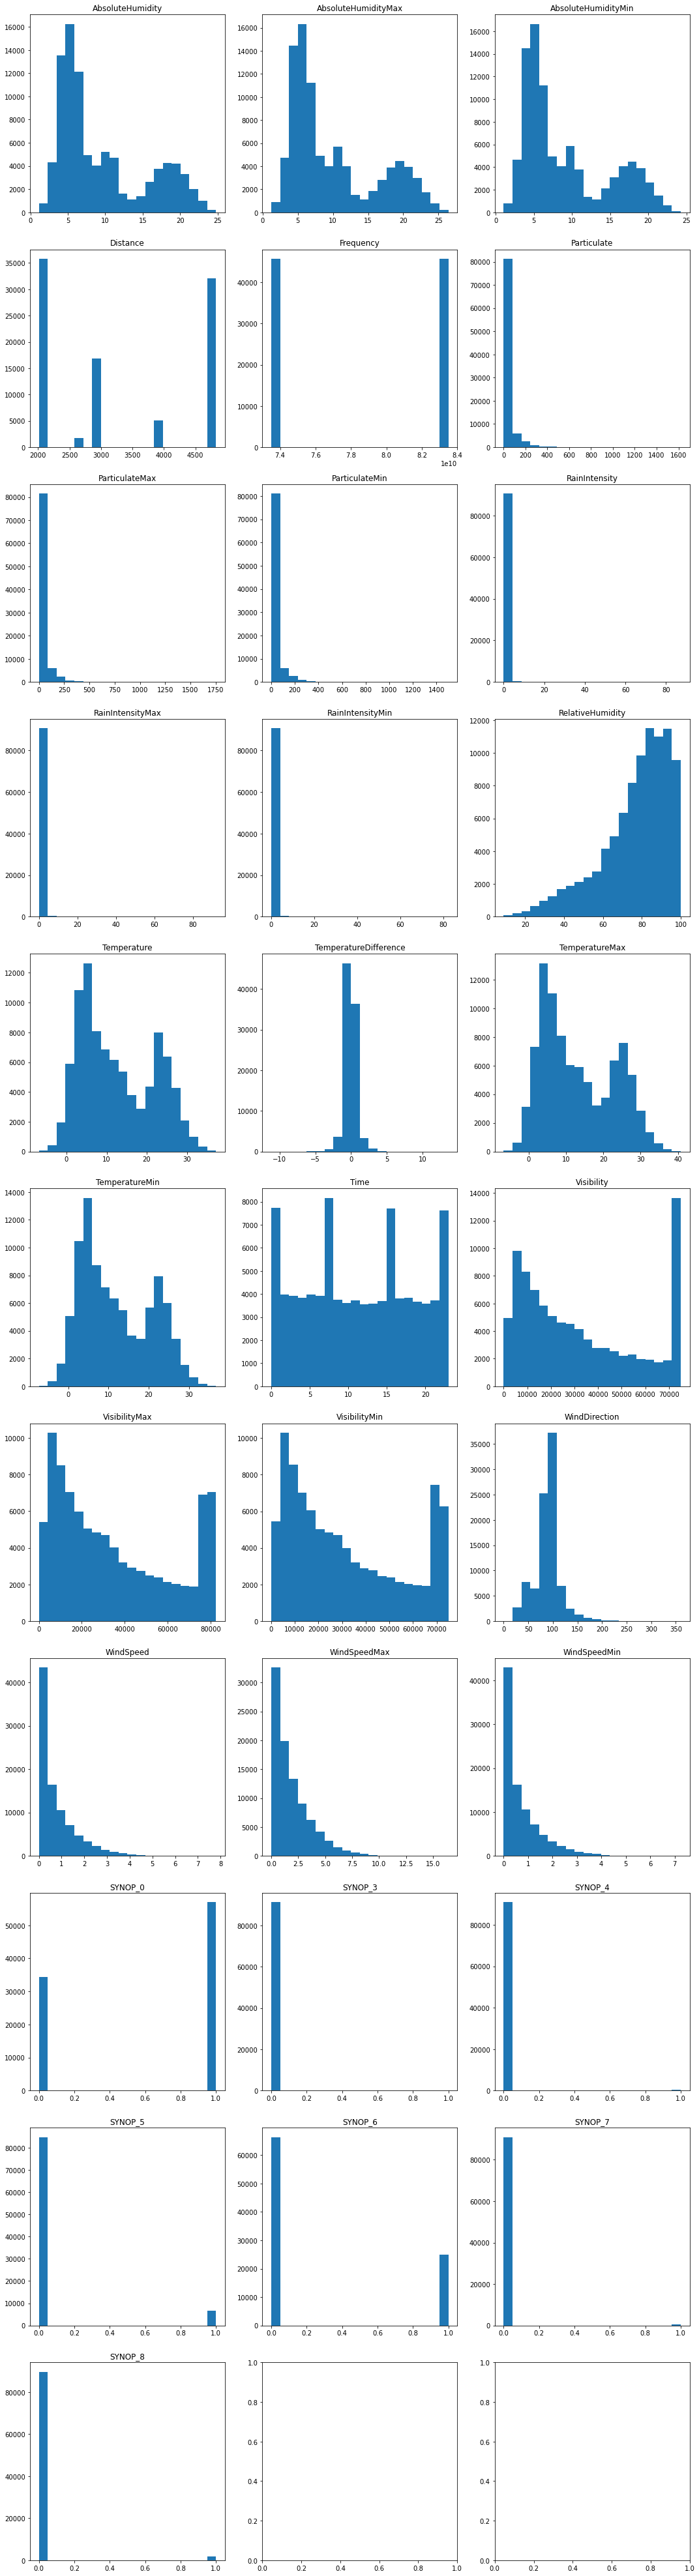

In [14]:
import matplotlib.pyplot as plt

# Exclude non-feature columns from visualization
feature_columns = rf_data.columns.drop(['RFL_Att'])

# Define the number of rows and columns for subplots
num_rows = int(len(feature_columns) / 3) + 1
num_cols = 3

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to facilitate indexing in the loop
axes = axes.flatten()

# Iterate over the feature columns and create plots
for i, feature in enumerate(feature_columns):
    # Plot the feature in the corresponding subplot
    axes[i].hist(rf_data[feature], bins=20)
    axes[i].set_title(feature)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## Split Data

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = rf_data.drop('RFL_Att', axis=1)
y = rf_data['RFL_Att']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Correlation

In [ ]:
# # Create a correlation matrix heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(rf_data.corr(), annot=True, cmap='coolwarm')
# plt.show()

In [ ]:
# # Calculate correlations with the target variable ('RFL_Att')
# correlations = rf_data.corr()['RFL_Att'].sort_values(ascending=False)
# print(correlations)

## Feature Selection

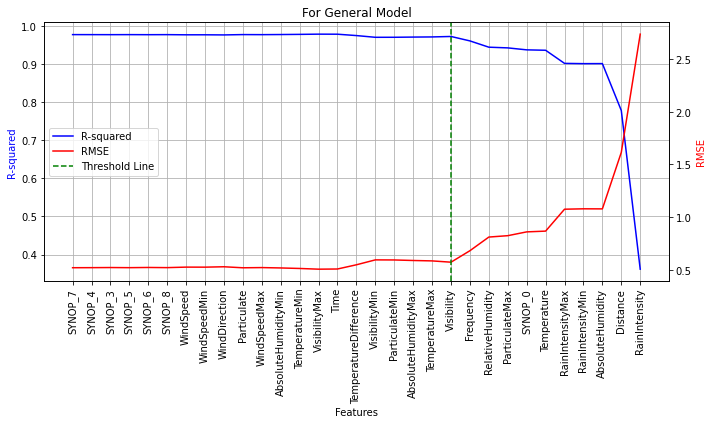

In [16]:
# Create a Random Forest regressor with OOB scoring enabled
model = RandomForestRegressor(oob_score=True, random_state=42, n_jobs = -1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the feature importances from the model
feature_importances = model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Get the names of the selected features
selected_feature_names = X_train.columns[sorted_indices].tolist()

# Reverse the names of the features
selected_feature_names.reverse()

# Initialize a list to store the results
results = []
rmse_values = []
r2_values = []

# Select all features
selected_features = sorted_indices.copy()

while len(selected_features) > 0:
    # Train the model with the selected features
    model.fit(X_train.iloc[:, selected_features], y_train)

    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train.iloc[:, selected_features])
    y_test_pred = model.predict(X_test.iloc[:, selected_features])

    # Calculate RMSE and R-squared values
    MSE_train = np.square(np.subtract(y_train, y_train_pred)).mean()
    train_rmse = np.sqrt(MSE_train)
    MSE_test = np.square(np.subtract(y_test, y_test_pred)).mean()
    test_rmse = np.sqrt(MSE_test)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Append the values to the respective lists
    rmse_values.append(test_rmse)
    r2_values.append(test_r2)

    # Store the results
    results.append((train_rmse, test_rmse, train_r2, test_r2))

    # Remove the least important feature and its name
    selected_features = selected_features[:-1]


# Get the index of the "frequency" feature
frequency_idx = selected_feature_names.index("Visibility")

# Plot the RMSE and R-squared values
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(selected_feature_names, r2_values, 'b-', label='R-squared')
ax2.plot(selected_feature_names, rmse_values, 'r-', label='RMSE')

# Plot the vertical line at the "frequency" feature position
ax2.axvline(x=frequency_idx, color='g', linestyle='--', label='Threshold Line')

# Rotate the labels
ax1.tick_params(axis='x', labelrotation = 90)

# Label names
ax1.set_xlabel('Features')
ax1.set_ylabel('R-squared', color='b')
ax2.set_ylabel('RMSE', color='r')
ax1.grid(True)

# Display the legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
# ax1.legend(lines, labels, loc='best')
ax1.legend(lines, labels, loc='center left')


# plt.xticks(selected_feature_names,rotation=90)
plt.title('For General Model')

plt.tight_layout()
plt.show()

# SYNOP Code

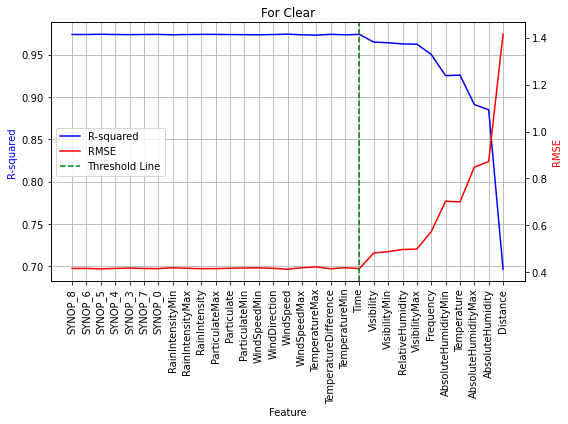

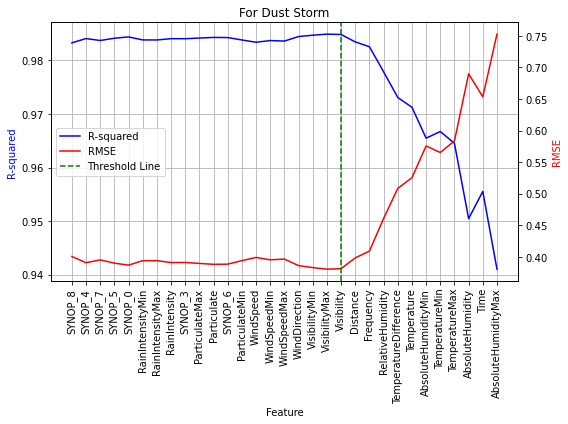

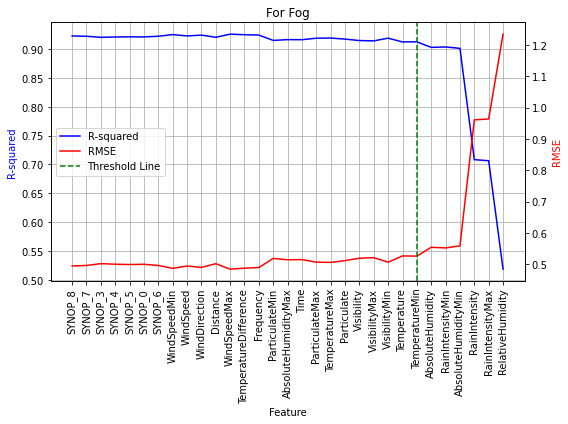

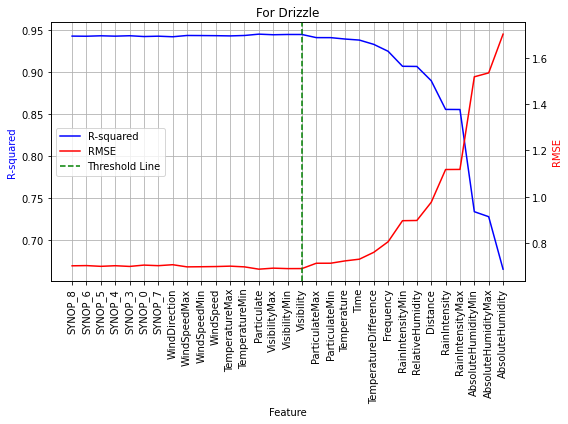

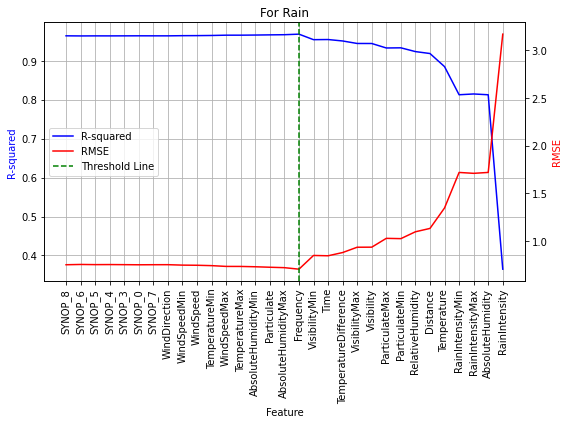

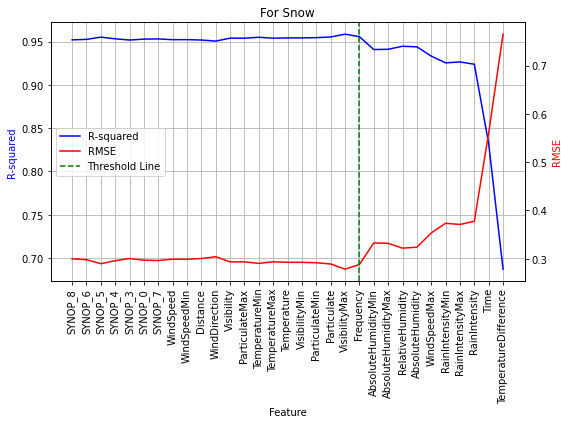

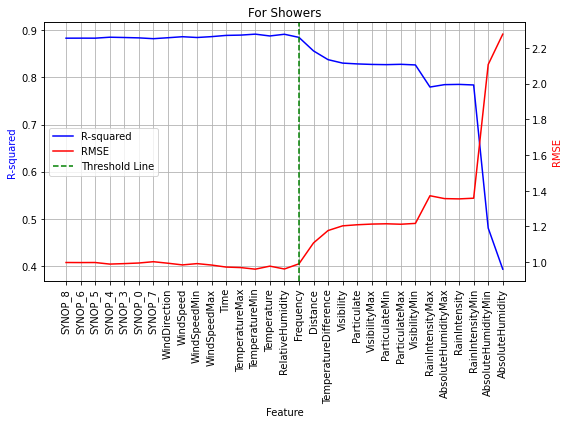

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create a dictionary to store RMSE and R-squared values for each SYNOP subset
results = {}

# Define the list of SYNOP code columns
synop_columns = ['SYNOP_0', 'SYNOP_3', 'SYNOP_4', 'SYNOP_5', 'SYNOP_6', 'SYNOP_7', 'SYNOP_8']


# Iterate over each SYNOP code column
for synop_column in synop_columns:
    # Filter the dataset where SYNOP code column has a value of 1
    rf_data_copy = rf_data.copy()
    subset = rf_data_copy[rf_data_copy[synop_column] == 1]

    # Check if there are any rows for the specific SYNOP code
    if len(subset) == 0:
        print(f"No data for SYNOP {synop_column.replace('SYNOP_', '')}")
        continue

    # Split the subset into training and testing data
    X_train, X_test, y_train, rfl_y_test = train_test_split(subset.drop('RFL_Att', axis=1), subset['RFL_Att'], test_size=0.3, random_state=42)

    # Create a Random Forest regressor
    model = RandomForestRegressor(random_state=42, n_jobs=-1)

    # Train the model
    model.fit(X_train, y_train)

    # Get the feature importances from the model
    feature_importances = model.feature_importances_

    # Sort the feature importances in descending order
    sorted_indices = feature_importances.argsort()[::-1]

    # Get the names of the selected features
    selected_feature_names = X_train.columns[sorted_indices].tolist()

    # Reverse the names of the features
    selected_feature_names.reverse()

    # Initialize lists to store the results
    rfl_test_rmse_values = []
    rfl_test_r2_values = []
    rfl_train_rmse_values = []
    rfl_train_r2_values = []

    while len(sorted_indices) > 0:
        # Train the model with the selected features
        model.fit(X_train.iloc[:, sorted_indices], y_train)

        # Make predictions on training and testing data
        rfl_y_train_pred = model.predict(X_train.iloc[:, sorted_indices])
        rfl_y_test_pred = model.predict(X_test.iloc[:, sorted_indices])

        # Calculate RMSE and R-squared values
        train_rmse = np.sqrt(mean_squared_error(y_train, rfl_y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(rfl_y_test, rfl_y_test_pred))
        train_r2 = r2_score(y_train, rfl_y_train_pred)
        test_r2 = r2_score(rfl_y_test, rfl_y_test_pred)

        # Append the values to the respective lists
        rfl_test_rmse_values.append(test_rmse)
        rfl_test_r2_values.append(test_r2)
        
        # Append the values to the respective lists
        rfl_train_rmse_values.append(train_rmse)
        rfl_train_r2_values.append(train_r2)

        # Remove the least important feature and its name
        sorted_indices = sorted_indices[:-1]

    # Store the results for the SYNOP value
    if synop_column == 'SYNOP_0':
        synop_name = 'Clear'
        line_idx = selected_feature_names.index("Time")
        
    elif synop_column == 'SYNOP_3':
        synop_name = 'Dust Storm'
        line_idx = selected_feature_names.index("Visibility")
        
    elif synop_column == 'SYNOP_4':
        synop_name = 'Fog'
        line_idx = selected_feature_names.index("TemperatureMin")
    
    elif synop_column == 'SYNOP_5':
        synop_name = 'Drizzle'
        line_idx = selected_feature_names.index("Visibility")
        
    elif synop_column == 'SYNOP_6':
        synop_name = 'Rain'
        line_idx = selected_feature_names.index("Frequency")
        
    elif synop_column == 'SYNOP_7':
        synop_name = 'Snow'
        line_idx = selected_feature_names.index("Frequency")
        
    elif synop_column == 'SYNOP_8':
        synop_name = 'Showers'
        line_idx = selected_feature_names.index("Frequency")
        

    results[synop_name] = {'RMSE': rfl_test_rmse_values, 'R-squared': rfl_test_r2_values}

    # Plot the RMSE and R-squared values
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax2 = ax1.twinx()

    num_features = list(range(1, len(selected_feature_names) + 1))

    ax1.plot(num_features, rfl_test_r2_values, 'b-', label='R-squared')
    ax2.plot(num_features, rfl_test_rmse_values, 'r-', label='RMSE')

    # Plot the vertical line
    ax2.axvline(x=(line_idx+1), color='g', linestyle='--', label='Threshold Line')

    ax1.set_xticks(num_features)
    ax1.set_xticklabels(selected_feature_names, rotation=90)

    ax1.set_xlabel('Feature')
    ax1.set_ylabel('R-squared', color='b')
    ax2.set_ylabel('RMSE', color='r')
    ax1.grid(True)

    # Display the legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
#     ax1.legend(lines, labels, loc='best')
    ax1.legend(lines, labels, loc='center left')


    plt.title(f'For {synop_name}')
    plt.tight_layout()
    plt.show()


In [ ]:
print("Average Test RMSE: ", np.average(rfl_test_rmse_values))
print("Average Test R_2: ", np.average(rfl_test_r2_values))
print("Average Train RMSE: ", np.average(rfl_train_rmse_values))
print("Average Train R_2: ", np.average(rfl_train_r2_values))

As from the general model we can see that some of the variables are not important so we will remove them from the model, and fine tune the hyperparameter.

In [ ]:
rf_data_copy_general = rf_data.copy()
rf_data_copy_general.drop(['SYNOP_7','SYNOP_4','SYNOP_3','SYNOP_5', 'SYNOP_6', 'SYNOP_8', 
                           'WindSpeed','WindSpeedMin', 'WindDirection','Particulate','WindSpeedMax', 
                           'AbsoluteHumidityMin','TemperatureMin', 'VisibilityMax','Time','TemperatureDifference',
                           'VisibilityMin','ParticulateMin','AbsoluteHumidityMax', 'TemperatureMax'], axis=1, inplace=True)

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = rf_data_copy_general.drop('RFL_Att', axis=1)
y = rf_data_copy_general['RFL_Att']

# Split the data into training and testing sets
X_train, X_test, y_train, rfl_general_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the training and testing data
rfl_general_train_predictions = rf.predict(X_train)
rfl_general_test_predictions = rf.predict(X_test)

# Calculate the mean squared error
train_mse = mean_squared_error(y_train, rfl_general_train_predictions)
test_mse = mean_squared_error(rfl_general_y_test, rfl_general_test_predictions)

# Calculate root mean squared error  
rfl_general_train_rmse = math.sqrt(train_mse)

# Calculate root mean squared error 
rfl_general_test_rmse = math.sqrt(test_mse)

# Calculate the R-squared value
rfl_general_train_r2 = r2_score(y_train, rfl_general_train_predictions)
rfl_general_test_r2 = r2_score(rfl_general_y_test, rfl_general_test_predictions)

# Print the evaluation metrics
print("Train RMSE:", rfl_general_train_rmse)
print("Test RMSE:", rfl_general_test_rmse)
print("Train R^2:", rfl_general_train_r2)
print("Test R^2:", rfl_general_test_r2)

In [ ]:
# # Calculate the absolute errors
# errors = abs(test_predictions - y_test)

# # Calculate mean absolute percentage error (MAPE)
# mape = 100 * (errors / y_test)

# # Calculate and display accuracy
# accuracy = 100 - np.mean(mape)
# print('Model Accuracy:', round(accuracy, 2), '%.')

## Tune the General Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [40, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a Random Forest Regressor object
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model on the training data
best_rf.fit(X_train, y_train)

# Make predictions on the training and testing data
rfl_train_predictions = best_rf.predict(X_train)
rfl_test_predictions = best_rf.predict(X_test)

# Calculate the RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, rfl_train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, rfl_test_predictions))

# Calculate the R-squared value
train_r2 = r2_score(y_train, rfl_train_predictions)
test_r2 = r2_score(y_test, rfl_test_predictions)

# Print the evaluation metrics
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)
print("Best Parameters:", best_params)

In [ ]:
# # Calculate the absolute errors
# errors = abs(test_predictions - y_test)

# # Calculate mean absolute percentage error (MAPE)
# mape = 100 * (errors / y_test)

# # Calculate and display accuracy
# accuracy = 100 - np.mean(mape)
# print('Fine-tuned model Accuracy:', round(accuracy, 2), '%.')

# Mutual Information

In [ ]:
# # Print the evaluation metrics
# print("Train RMSE:", rfl_general_train_rmse)
# print("Test RMSE:", rfl_general_test_rmse)
# print("Train R^2:", rfl_general_train_r2)
# print("Test R^2:", rfl_general_test_r2)

# # Print the evaluation metrics
# print("Train RMSE:", fso_general_train_rmse)
# print("Test RMSE:", fso_general_test_rmse)
# print("Train R^2:", fso_general_train_r2)
# print("Test R^2:", fso_general_test_r2)

# # Make predictions on the training and testing data
# rfl_general_train_predictions = rf.predict(X_train)
# rfl_general_test_predictions = rf.predict(X_test)

# # Make predictions on the training and testing data
# fso_general_train_predictions = rf.predict(X_train)
# fso_general_test_predictions = rf.predict(X_test)

# # Make predictions on training and testing data
#         rfl_y_train_pred = model.predict(X_train.iloc[:, sorted_indices])
#         rfl_y_test_pred = model.predict(X_test.iloc[:, sorted_indices])
        
# # Make predictions on training and testing data
#         fso_y_train_pred = model.predict(X_train.iloc[:, sorted_indices])
#         fso_y_test_pred = model.predict(X_test.iloc[:, sorted_indices])

### For general Models

In [ ]:
from sklearn.metrics import mutual_info_score

# Calculate mutual information for testing
mutual_information = mutual_info_score(rfl_predictions, fso_predictions)
print("Mutual Information for General Model Testing: ",mutual_information)

In [ ]:
from sklearn.metrics import mutual_info_score

# Calculate mutual information for training
mutual_information = mutual_info_score(rfl_train_predictions, fso_general_tuned_train_predictions)
print("Mutual Information for General Model Training: ",mutual_information)

In [ ]:
from sklearn.metrics import mutual_info_score

# Calculate mutual information for testing
mutual_information = mutual_info_score(rfl_test_predictions, fso_general_tuned_test_predictions)
print("Mutual Information for General Model Testing: ",mutual_information)

### For Each Synop Codes

In [ ]:
from sklearn.metrics import mutual_info_score

# Calculate mutual information for training
mutual_information = mutual_info_score(rfl_y_train_pred, fso_y_train_pred)
print("Mutual Information for Synop Training: ",mutual_information)

In [ ]:
from sklearn.metrics import mutual_info_score

# Calculate mutual information for training
mutual_information = mutual_info_score(rfl_y_test_pred, fso_y_test_pred)
print("Mutual Information for Synop Training: ",mutual_information)

# Pearson Correlation Coefficient

### General Model

In [ ]:
data = {
    'RFL_Att': rfl_train_predictions,
    'FSO_Att': fso_general_tuned_train_predictions
}

df = pd.DataFrame(data)

# Calculate the Pearson correlation coefficient
correlation = df['RFL_Att'].corr(df['FSO_Att'])

print("Pearson Correlation Coefficient for general model training:", correlation)

In [ ]:
data = {
    'RFL_Att': rfl_test_predictions,
    'FSO_Att': fso_general_tuned_test_predictions
}

df = pd.DataFrame(data)

# Calculate the Pearson correlation coefficient
correlation = df['RFL_Att'].corr(df['FSO_Att'])

print("Pearson Correlation Coefficient for general model testing:", correlation)

In [ ]:
data = {
    'RFL_Att': rfl_general_y_test,
    'FSO_Att': fso_general_y_test
}

df = pd.DataFrame(data)

# Calculate the Pearson correlation coefficient
correlation = df['RFL_Att'].corr(df['FSO_Att'])

print("Pearson Correlation Coefficient for general model testing:", correlation)

### For Synop Code

In [ ]:
data = {
    'RFL_Att': rfl_y_train_pred,
    'FSO_Att': fso_y_train_pred
}

df = pd.DataFrame(data)

# Calculate the Pearson correlation coefficient
correlation = df['RFL_Att'].corr(df['FSO_Att'])

print("Pearson Correlation Coefficient for synop training:", correlation)

In [ ]:
data = {
    'RFL_Att': rfl_y_test_pred,
    'FSO_Att': fso_y_test_pred
}

df = pd.DataFrame(data)

# Calculate the Pearson correlation coefficient
correlation = df['RFL_Att'].corr(df['FSO_Att'])

print("Pearson Correlation Coefficient for synop testing:", correlation)

In [ ]:
data = {
    'RFL_Att': rfl_y_test,
    'FSO_Att': fso_y_test
}

df = pd.DataFrame(data)

# Calculate the Pearson correlation coefficient
correlation = df['RFL_Att'].corr(df['FSO_Att'])

print("Pearson Correlation Coefficient for general model testing:", correlation)